In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import datetime

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 코로나 확진자 이동 경로 파일
df1 = pd.read_csv('./data_2/daily2.csv', header='infer',encoding = 'euc-kr', na_values=[' '])

In [4]:
df1.dropna(inplace=True)

In [5]:
df1.sort_values(by='date', ascending = True, inplace=True)

In [6]:
df1.reset_index(drop = True, inplace=True)

In [7]:
df1['confirmed_day'] = df1['confirmed']

In [8]:
df1.drop('confirmed', axis=1, inplace=True)

In [9]:
df1.head()

,province,date,confirmed_day
0,합계,2020-03-01,586.0
1,검역,2020-03-01,0.0
2,제주,2020-03-01,0.0
3,경남,2020-03-01,4.0
4,경북,2020-03-01,67.0


In [10]:
df1.tail()

,province,date,confirmed_day
3688,부산,2020-09-03,4.0
3689,서울,2020-09-03,69.0
3690,합계,2020-09-03,195.0
3691,경기,2020-09-03,64.0
3692,검역,2020-09-03,3.0


In [11]:
df1.shape

(3693, 3)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   province       3693 non-null   object 
 1   date           3693 non-null   object 
 2   confirmed_day  3693 non-null   float64
dtypes: float64(1), object(2)
memory usage: 86.7+ KB


In [13]:
df1['confirmed_day'] = df1['confirmed_day'].astype('int64')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   province       3693 non-null   object
 1   date           3693 non-null   object
 2   confirmed_day  3693 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 86.7+ KB


In [15]:
df1_sum = df1[df1['province']=='합계']

In [16]:
df1_sum.reset_index(drop = True, inplace=True)

In [17]:
df1_sum.head()

,province,date,confirmed_day
0,합계,2020-03-01,586
1,합계,2020-03-04,516
2,합계,2020-03-05,438
3,합계,2020-03-06,518
4,합계,2020-03-07,483


In [18]:
df1_sum.shape

(195, 3)

In [19]:
df1_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   province       195 non-null    object
 1   date           195 non-null    object
 2   confirmed_day  195 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.7+ KB


In [20]:
# 3월 1일 이전 데이터 추가
df1_time= pd.read_csv('./data_2/Time_2.csv', header='infer',encoding = 'utf-8', na_values=[' '])

In [21]:
df1_time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [22]:
df1_time.shape

(163, 7)

In [23]:
df1_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


In [24]:
# 일일 확진자수 열 생성
df1_time['confirmed_day'] = df1_time['confirmed']

In [25]:
df1_time.shape

(163, 8)

In [26]:
# 일일 확진자수 계산
for i in range(df1_time.shape[0]):
    if i == 0:
        df1_time.iloc[0, 7] = df1_time.iloc[0, 4]
    elif i >= 1:
        df1_time.iloc[i, 7] = df1_time.iloc[i, 4] - df1_time.iloc[i-1, 4]

In [27]:
df1_time.head()

,date,time,test,negative,confirmed,released,deceased,confirmed_day
0,2020-01-20,16,1,0,1,0,0,1
1,2020-01-21,16,1,0,1,0,0,0
2,2020-01-22,16,4,3,1,0,0,0
3,2020-01-23,16,22,21,1,0,0,0
4,2020-01-24,16,27,25,2,0,0,1


In [28]:
df1_time.iloc[30:50, :]

,date,time,test,negative,confirmed,released,deceased,confirmed_day
30,2020-02-19,16,11173,9973,51,16,0,20
31,2020-02-20,16,13202,11238,104,16,1,53
32,2020-02-21,16,16400,13016,204,17,2,100
33,2020-02-22,16,21586,15116,433,18,2,229
34,2020-02-23,16,26179,17520,602,18,6,169
35,2020-02-24,16,32756,20292,833,24,8,231
36,2020-02-25,16,40304,25447,977,24,12,144
37,2020-02-26,16,53553,31576,1261,24,12,284
38,2020-02-27,16,66652,39318,1766,26,13,505
39,2020-02-28,16,81167,48593,2337,27,13,571


In [29]:
df2 = pd.read_csv('./data_2/Policy.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [30]:
df2.set_index(['policy_id'], inplace=True)

In [31]:
df2.head()

,country,type,gov_policy,detail,start_date,end_date
policy_id,,,,,,
1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,2020-09-04
5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,2020-09-04


In [32]:
df2.shape

(58, 6)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1 to 58
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     58 non-null     object
 1   type        58 non-null     object
 2   gov_policy  58 non-null     object
 3   detail      58 non-null     object
 4   start_date  58 non-null     object
 5   end_date    58 non-null     object
dtypes: object(6)
memory usage: 3.2+ KB


In [34]:
df2_alert = df2[df2['type']=='Alert']

In [35]:
df2_alert.head()

,country,type,gov_policy,detail,start_date,end_date
policy_id,,,,,,
1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,2020-09-04


In [36]:
df1_level2 = df1_time[(df1_time['date'] >= df2.loc[2, 'start_date']) & (df1_time['date'] <= df2.loc[2, 'end_date'])]

In [37]:
df1_level2.head()

,date,time,test,negative,confirmed,released,deceased,confirmed_day
0,2020-01-20,16,1,0,1,0,0,1
1,2020-01-21,16,1,0,1,0,0,0
2,2020-01-22,16,4,3,1,0,0,0
3,2020-01-23,16,22,21,1,0,0,0
4,2020-01-24,16,27,25,2,0,0,1


In [38]:
df1_level2.shape

(8, 8)

In [39]:
df1_level2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           8 non-null      object
 1   time           8 non-null      int64 
 2   test           8 non-null      int64 
 3   negative       8 non-null      int64 
 4   confirmed      8 non-null      int64 
 5   released       8 non-null      int64 
 6   deceased       8 non-null      int64 
 7   confirmed_day  8 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 576.0+ bytes


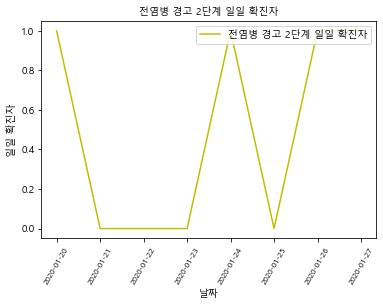

In [40]:
plt.plot(df1_level2['date'], df1_level2['confirmed_day'],label='전염병 경고 2단계 일일 확진자', color='y')
plt.xlabel('날짜', fontsize=10)
plt.ylabel('일일 확진자', fontsize=10)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=10)
plt.title('전염병 경고 2단계 일일 확진자', fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [41]:
df1_level3 = df1_time[(df1_time['date'] >= df2.loc[3, 'start_date']) & (df1_time['date'] <= df2.loc[3, 'end_date'])]

In [42]:
df1_level3.head()

,date,time,test,negative,confirmed,released,deceased,confirmed_day
8,2020-01-28,16,116,97,4,0,0,0
9,2020-01-29,16,187,155,4,0,0,0
10,2020-01-30,16,246,199,6,0,0,2
11,2020-01-31,16,312,245,11,0,0,5
12,2020-02-01,16,371,289,12,0,0,1


In [43]:
df1_level3.shape

(26, 8)

In [44]:
df1_level3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 8 to 33
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           26 non-null     object
 1   time           26 non-null     int64 
 2   test           26 non-null     int64 
 3   negative       26 non-null     int64 
 4   confirmed      26 non-null     int64 
 5   released       26 non-null     int64 
 6   deceased       26 non-null     int64 
 7   confirmed_day  26 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.8+ KB


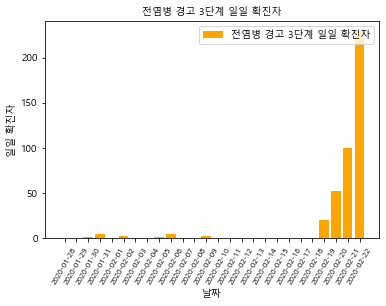

In [45]:
plt.bar(df1_level3['date'], df1_level3['confirmed_day'],label='전염병 경고 3단계 일일 확진자', color='orange')
plt.xlabel('날짜', fontsize=10)
plt.ylabel('일일 확진자', fontsize=10)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=10)
plt.title('전염병 경고 3단계 일일 확진자', fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [46]:
df1_level4_left = df1_time[(df1_time['date'] >= df2.loc[4, 'start_date'])]

In [47]:
df1_level4_left['province'] = '합계'

In [48]:
df1_level4_left = df1_level4_left[['province', 'date', 'confirmed_day']]

In [49]:
df1_level4_left.tail()

,province,date,confirmed_day
158,합계,2020-06-26,39
159,합계,2020-06-27,51
160,합계,2020-06-28,62
161,합계,2020-06-29,42
162,합계,2020-06-30,43


In [50]:
df1_level4_left.shape

(129, 3)

In [51]:
df1_level4_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 34 to 162
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   province       129 non-null    object
 1   date           129 non-null    object
 2   confirmed_day  129 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.0+ KB


In [52]:
df1_level4_right = df1_sum[(df1_sum['date'] >= '2020-07-01')]

In [53]:
df1_level4_right.head()

,province,date,confirmed_day
129,합계,2020-07-01,51
130,합계,2020-07-02,54
131,합계,2020-07-03,63
132,합계,2020-07-04,63
133,합계,2020-07-05,61


In [54]:
df1_level4_right.tail()

,province,date,confirmed_day
190,합계,2020-08-30,299
191,합계,2020-08-31,248
192,합계,2020-09-01,235
193,합계,2020-09-02,267
194,합계,2020-09-03,195


In [55]:
df1_level4_right.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 129 to 194
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   province       66 non-null     object
 1   date           66 non-null     object
 2   confirmed_day  66 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [56]:
df1_level4 = pd.concat([df1_level4_left, df1_level4_right])

In [57]:
df1_level4.head()

,province,date,confirmed_day
34,합계,2020-02-23,169
35,합계,2020-02-24,231
36,합계,2020-02-25,144
37,합계,2020-02-26,284
38,합계,2020-02-27,505


In [58]:
df1_level4.tail()

,province,date,confirmed_day
190,합계,2020-08-30,299
191,합계,2020-08-31,248
192,합계,2020-09-01,235
193,합계,2020-09-02,267
194,합계,2020-09-03,195


In [59]:
df1_level4.shape

(195, 3)

In [60]:
df1_level4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 34 to 194
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   province       195 non-null    object
 1   date           195 non-null    object
 2   confirmed_day  195 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.1+ KB


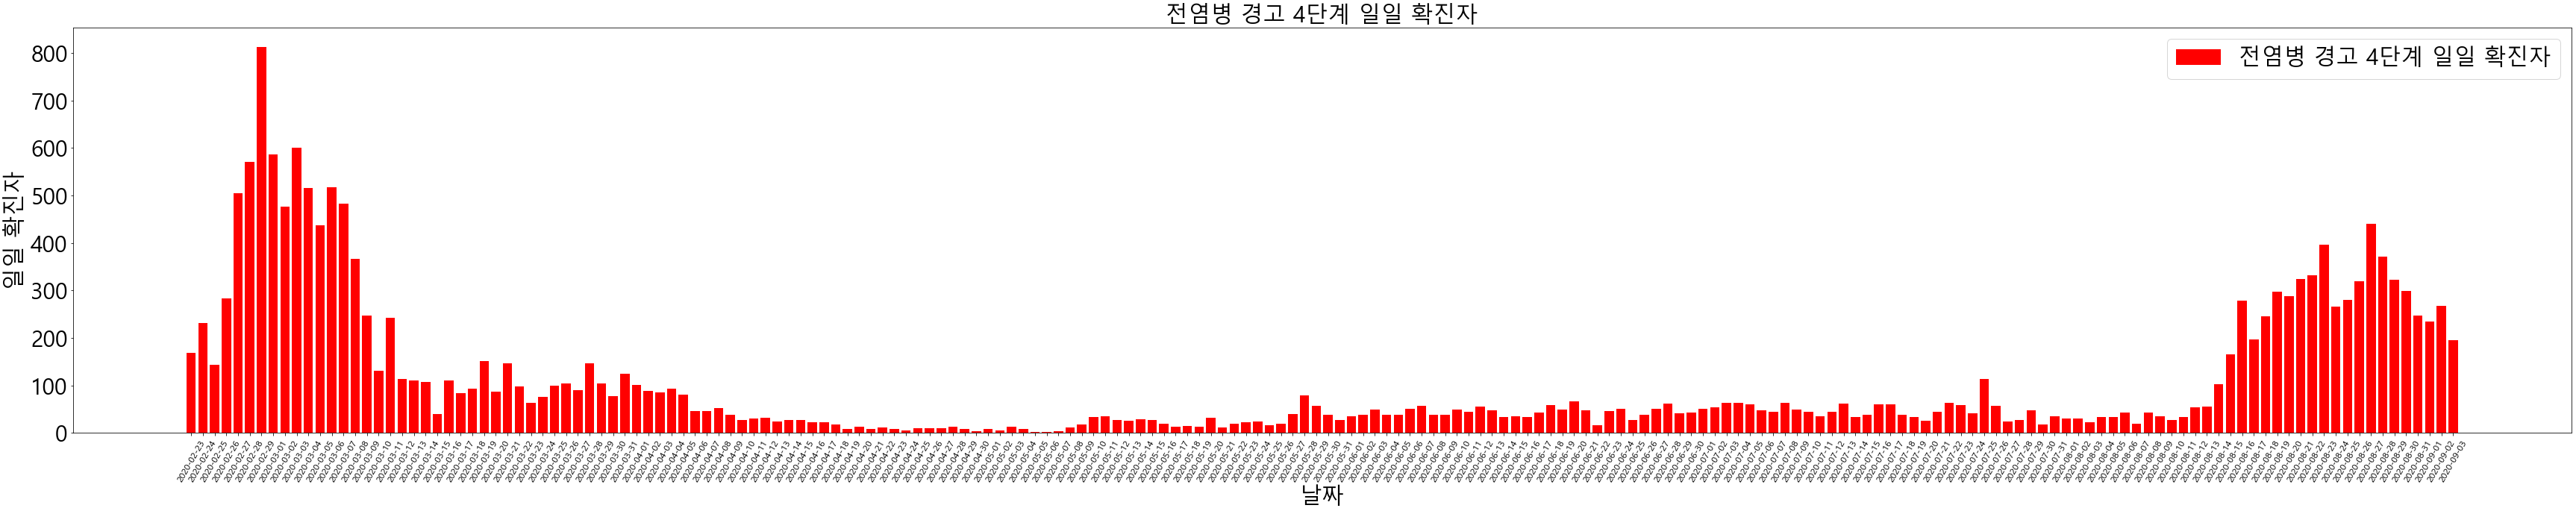

In [61]:
plt.figure(figsize=(60, 10))
plt.bar(df1_level4['date'], df1_level4['confirmed_day'],label='전염병 경고 4단계 일일 확진자', color='red')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=30)
plt.title('전염병 경고 4단계 일일 확진자', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

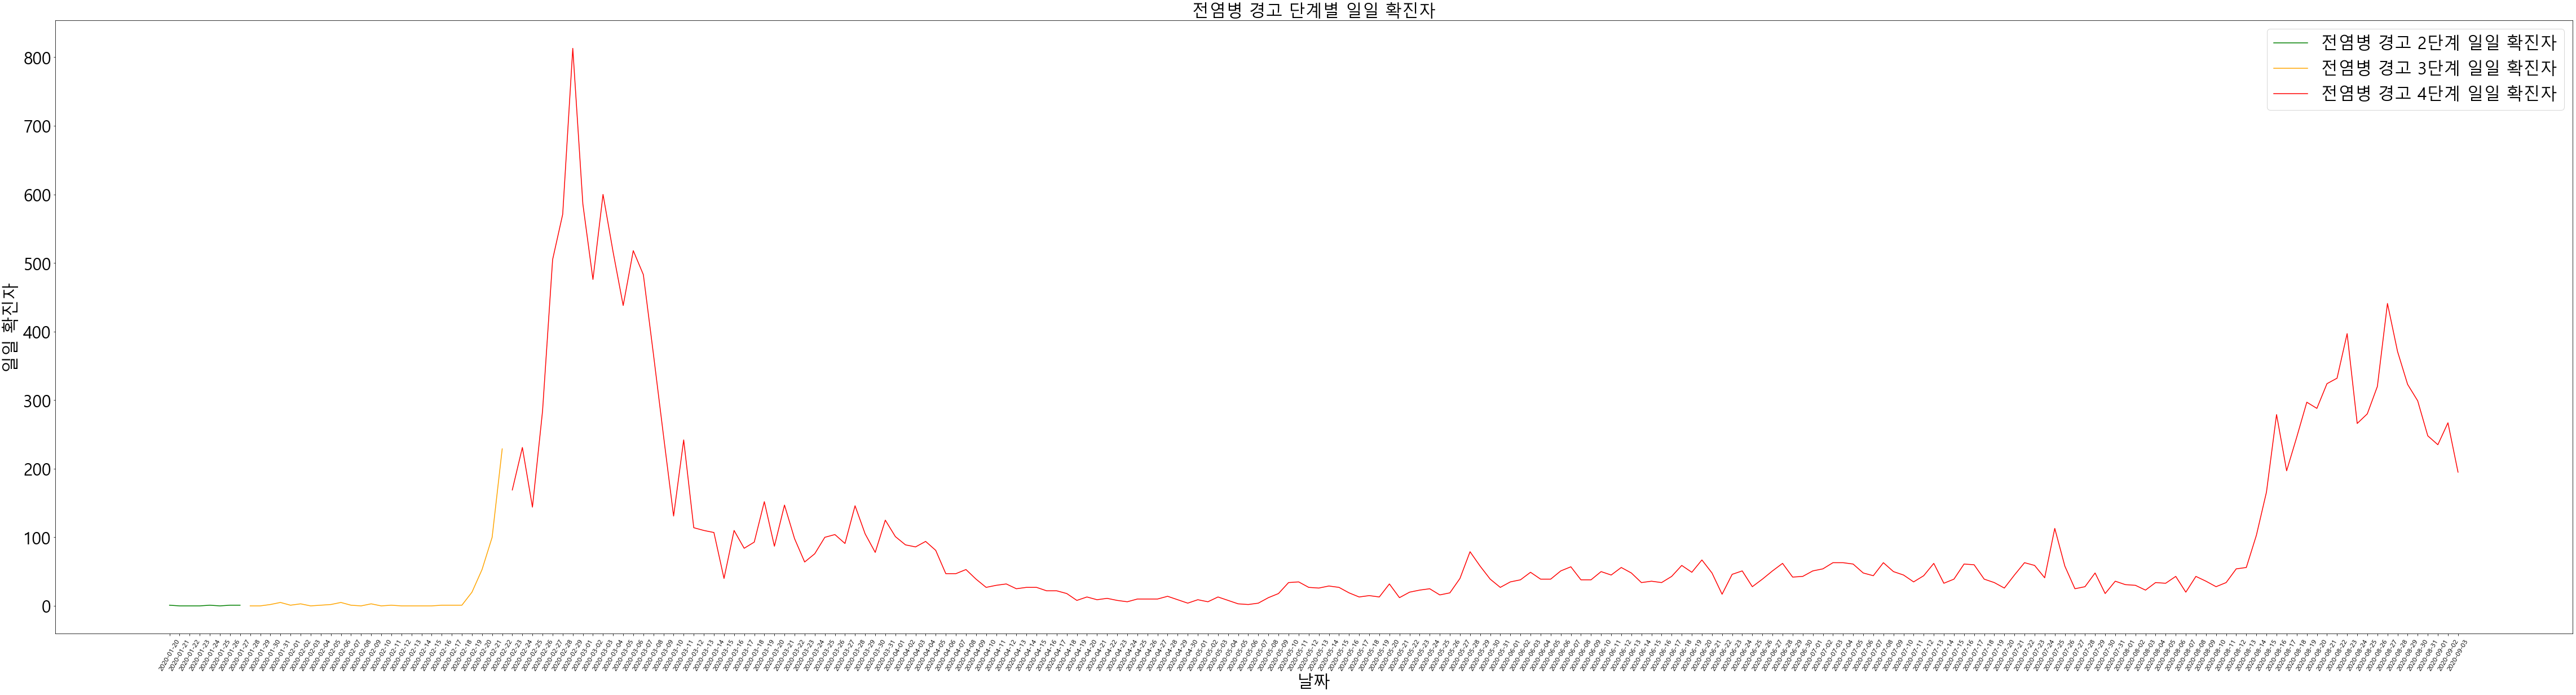

In [63]:
plt.figure(figsize=(80, 20))
plt.plot(df1_level2['date'], df1_level2['confirmed_day'],label='전염병 경고 2단계 일일 확진자', color='green')
plt.plot(df1_level3['date'], df1_level3['confirmed_day'],label='전염병 경고 3단계 일일 확진자', color='orange')
plt.plot(df1_level4['date'], df1_level4['confirmed_day'],label='전염병 경고 4단계 일일 확진자', color='red')

plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=30)
plt.title('전염병 경고 단계별 일일 확진자', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()